<i>Get Hands on at - https://huggingface.co/spaces/shreerampawar/EmoInt</i>

<h2><b>Emotion Classification with Machine Learning and Neural Networks</b></h2>

In [105]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

**Data Loading and Preprocessing**

First, we load the emotion-labeled text data from multiple files for training, validation, and testing. Each dataset is read into separate DataFrames (train_full, val_full, test_full). We then concatenate these DataFrames to create a comprehensive dataset (df) for further processing.

In [106]:
anger_train = pd.read_csv("C:/Users/HP/Downloads/New folder/anger_train.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])
fear_train = pd.read_csv("C:/Users/HP/Downloads/New folder/fear_train.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])
joy_train = pd.read_csv("C:/Users/HP/Downloads/New folder/joy_train.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])
sadness_train = pd.read_csv("C:/Users/HP/Downloads/New folder/sadness_train.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])

anger_val = pd.read_csv("C:/Users/HP/Downloads/New folder/anger_val.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])
fear_val = pd.read_csv("C:/Users/HP/Downloads/New folder/fear_val.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])
joy_val = pd.read_csv("C:/Users/HP/Downloads/New folder/joy_val.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])
sadness_val = pd.read_csv("C:/Users/HP/Downloads/New folder/sadness_val.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])

anger_test = pd.read_csv("C:/Users/HP/Downloads/New folder/anger_test.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])
fear_test = pd.read_csv("C:/Users/HP/Downloads/New folder/fear_test.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])
joy_test = pd.read_csv("C:/Users/HP/Downloads/New folder/joy_test.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])
sadness_test = pd.read_csv("C:/Users/HP/Downloads/New folder/sadness_test.txt", delimiter='\t', header=None, names=['id', 'tweet', 'emotion', 'intensity'])


In [107]:
anger_train.head()

,id,tweet,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [108]:
train_full = pd.concat([anger_train, fear_train, joy_train, sadness_train])
val_full = pd.concat([anger_val, fear_val, joy_val, sadness_val])
test_full = pd.concat([anger_test, fear_test, joy_test, sadness_test])

In [367]:
train_full.to_csv("D:\Shreeram\Projects\AI\X_emo.csv", index=False)

In [109]:
train_full.head()

,id,tweet,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [110]:
train_full['emotion'].value_counts()

emotion
fear       1147
anger       857
joy         823
sadness     786
Name: count, dtype: int64

In [111]:
df = pd.concat([train_full, val_full, test_full])

**Text Preprocessing**

Next, we perform text preprocessing to clean and tokenize the tweet data. This includes removing URLs, special characters, and numbers, tokenizing the text, performing part-of-speech tagging, lemmatizing tokens, removing stopwords, and rejoining tokens into cleaned text.

In [112]:
import re
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

# Download required NLTK data
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun if POS tag not found

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and numbers (fix regex for @ and #)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)

    # POS tagging
    tagged_tokens = pos_tag(tokens)
    
    # Lemmatize tokens with POS tagging
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos_tag)) for token, pos_tag in tagged_tokens]

    # Normalize tokens (lowercase and remove stopwords)
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

    # Join tokens back into cleaned text
    cleaned_text = ' '.join(tokens)

    return cleaned_text, tokens

# Assuming df['tweet'] contains the text data
df['cleaned_tweet'], df['tokens'] = zip(*df['tweet'].apply(clean_text))

# Display the first few rows to verify
print(df.head())


      id                                              tweet emotion  \
0  10000  How the fu*k! Who the heck! moved my fridge!.....   anger   
1  10001  So my Indian Uber driver just called someone t...   anger   
2  10002  @DPD_UK I asked for my parcel to be delivered ...   anger   
3  10003  so ef whichever butt wipe pulled the fire alar...   anger   
4  10004  Don't join @BTCare they put the phone down on ...   anger   

   intensity                                      cleaned_tweet  \
0      0.938  fuk heck move fridge knock landlord door angry...   
1      0.896  indian uber driver call someone n word wasnt m...   
2      0.896  ask parcel deliver pick store address fuming p...   
3      0.896  ef whichever butt wipe pull fire alarm davis b...   
4      0.896  dont join put phone talk rude taking money acc...   

                                              tokens  
0  [fuk, heck, move, fridge, knock, landlord, doo...  
1  [indian, uber, driver, call, someone, n, word,...  
2  [a

In [113]:
df

,id,tweet,emotion,intensity,cleaned_tweet,tokens
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,fuk heck move fridge knock landlord door angry...,"[fuk, heck, move, fridge, knock, landlord, doo..."
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,indian uber driver call someone n word wasnt m...,"[indian, uber, driver, call, someone, n, word,..."
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,ask parcel deliver pick store address fuming p...,"[ask, parcel, deliver, pick, store, address, f..."
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,ef whichever butt wipe pull fire alarm davis b...,"[ef, whichever, butt, wipe, pull, fire, alarm,..."
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,dont join put phone talk rude taking money acc...,"[dont, join, put, phone, talk, rude, taking, m..."
...,...,...,...,...,...,...
668,41528,Why does Candice constantly pout #GBBO ðŸ’„ðŸ˜’,sadness,0.396,candice constantly pout gbbo,"[candice, constantly, pout, gbbo]"
669,41529,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness,0.604,unhappy redbus cc talk week still didnt initia...,"[unhappy, redbus, cc, talk, week, still, didnt..."
670,41530,"@AceOperative789 no pull him afew weeks ago, s...",sadness,0.479,pull afew week ago sadly theres game audio sou...,"[pull, afew, week, ago, sadly, theres, game, a..."
671,41531,I'm buying art supplies and I'm debating how s...,sadness,0.375,im buy art supply im debate serious buy acryli...,"[im, buy, art, supply, im, debate, serious, bu..."


**Exploratory Data Analysis (EDA)**

We conduct EDA to understand the distribution of emotion classes and visualize word clouds for each emotion category.

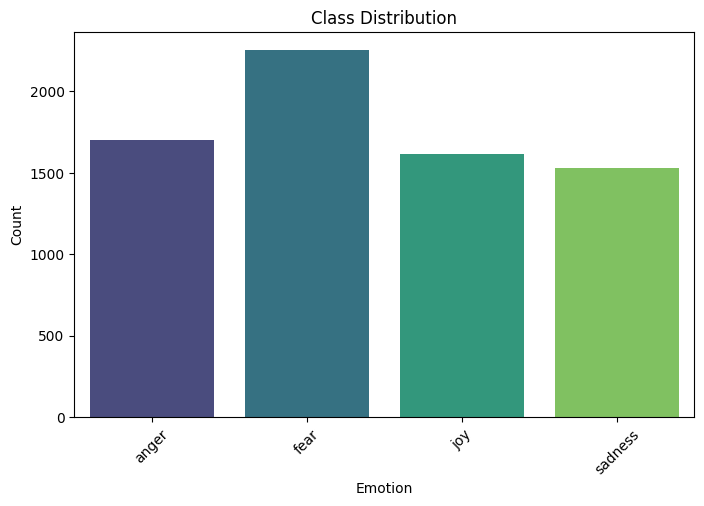

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the distribution of classes (emotions)
plt.figure(figsize=(8, 5))
sns.countplot(x='emotion', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


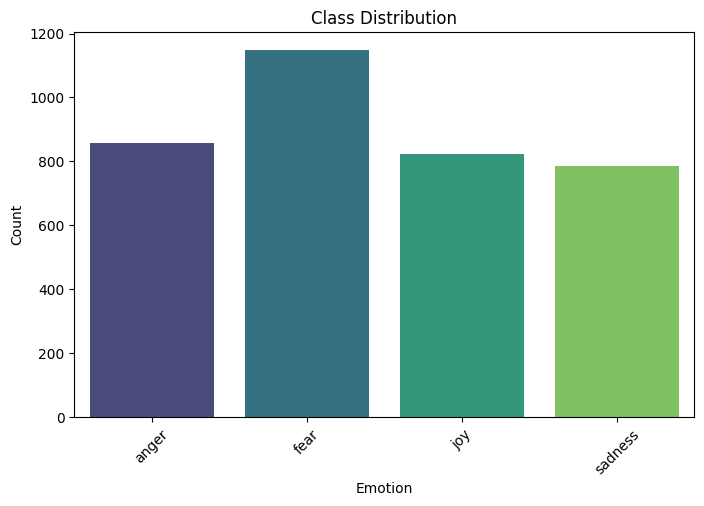

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the distribution of classes (emotions)
plt.figure(figsize=(8, 5))
sns.countplot(x='emotion', data=train_full, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


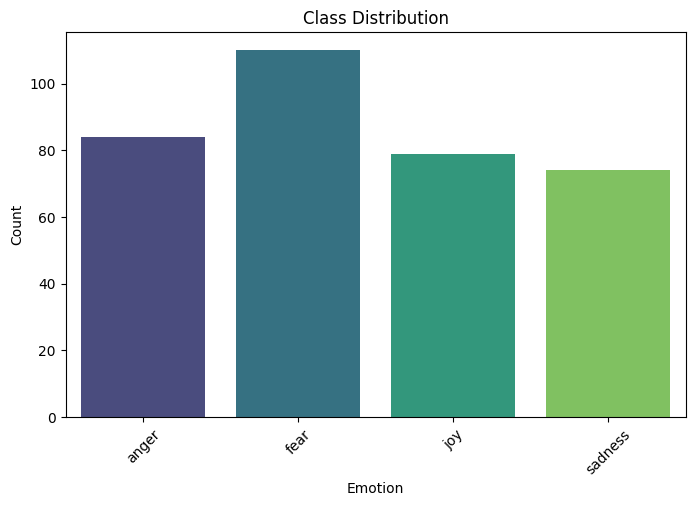

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the distribution of classes (emotions)
plt.figure(figsize=(8, 5))
sns.countplot(x='emotion', data=val_full, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


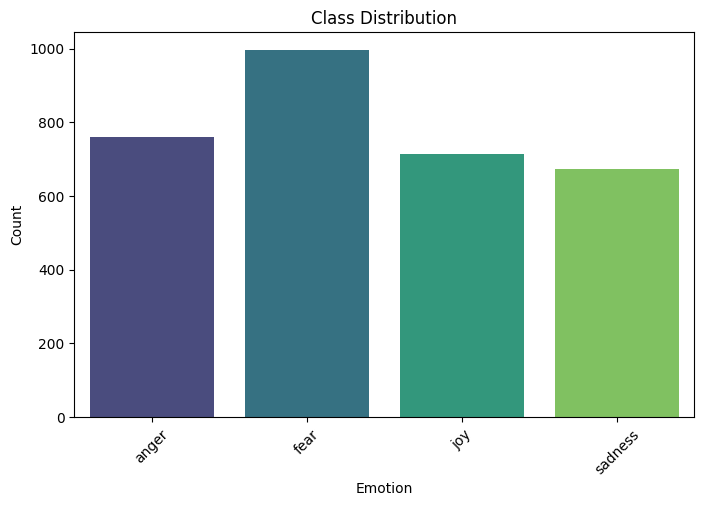

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the distribution of classes (emotions)
plt.figure(figsize=(8, 5))
sns.countplot(x='emotion', data=test_full, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


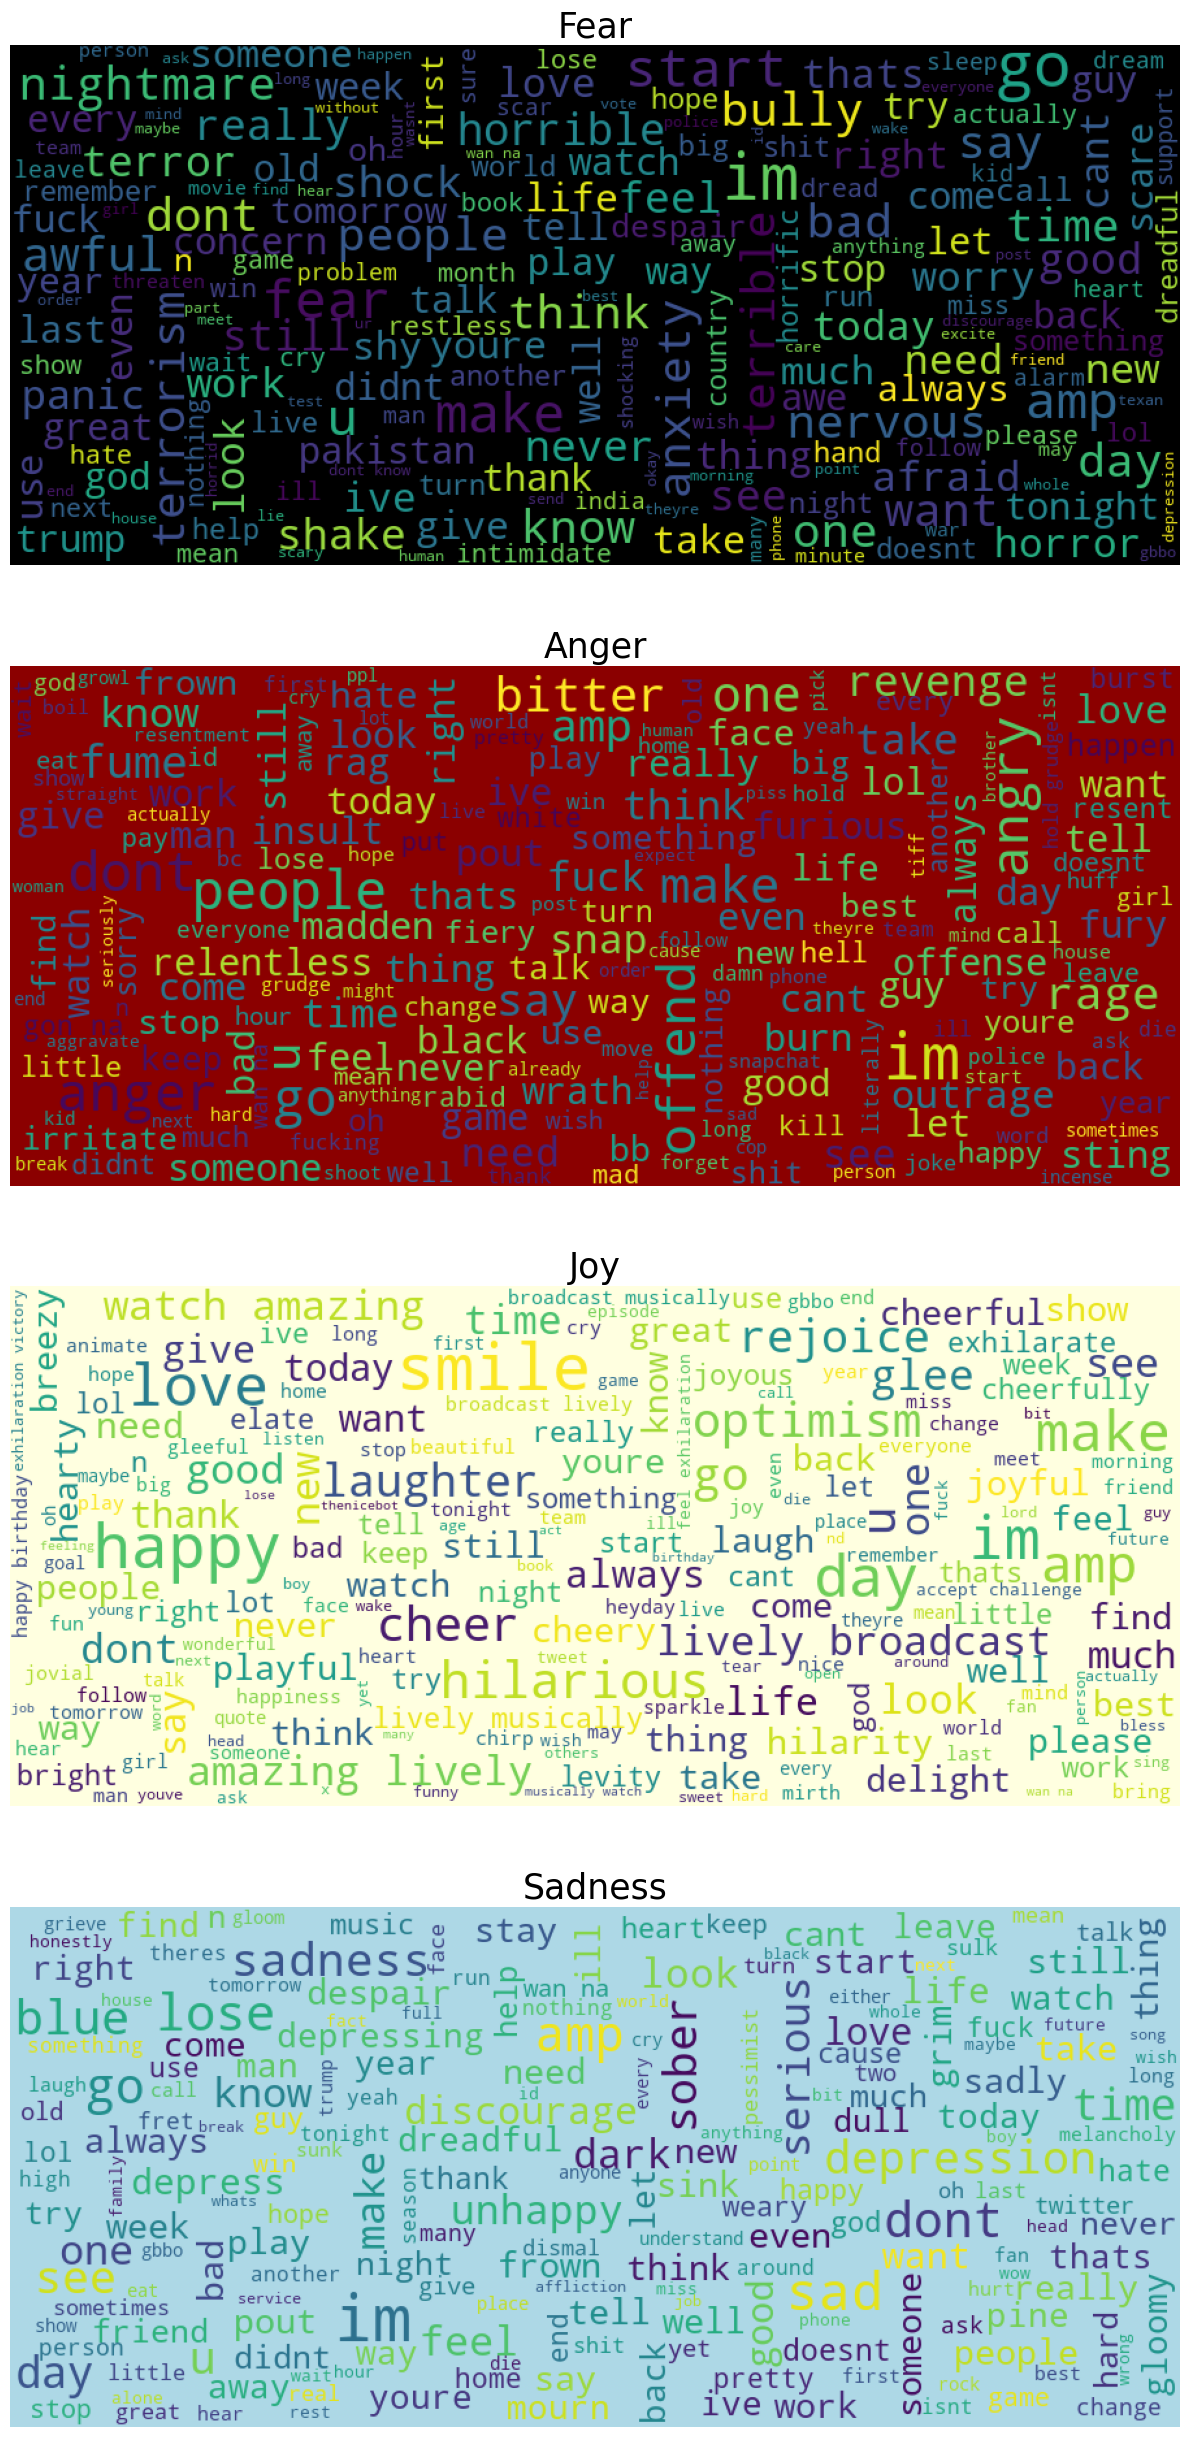

In [118]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine text for each emotion
join_text_fear = ' '.join(df[df['emotion']=='fear']['cleaned_tweet'].values)
join_text_anger = ' '.join(df[df['emotion']=='anger']['cleaned_tweet'].values)
join_text_joy = ' '.join(df[df['emotion']=='joy']['cleaned_tweet'].values)
join_text_sadness = ' '.join(df[df['emotion']=='sadness']['cleaned_tweet'].values)

fear_wordcloud = WordCloud(max_font_size=50, background_color='black',  width=900, height=400).generate(join_text_fear)
anger_wordcloud = WordCloud(max_font_size=50, background_color='darkred', width=900, height=400).generate(join_text_anger)
joy_wordcloud = WordCloud(max_font_size=50, background_color='lightyellow', width=900, height=400).generate(join_text_joy)
sadness_wordcloud = WordCloud(max_font_size=50, background_color='lightblue', width=900, height=400).generate(join_text_sadness)


# Plotting the word clouds in a single figure with subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 25))

ax1.imshow(fear_wordcloud)
ax1.set_title("Fear", size=25)
ax1.axis('off')

ax2.imshow(anger_wordcloud)
ax2.set_title("Anger", size=25)
ax2.axis('off')

ax3.imshow(joy_wordcloud)
ax3.set_title("Joy", size=25)
ax3.axis('off')

ax4.imshow(sadness_wordcloud)
ax4.set_title("Sadness", size=25)
ax4.axis('off')

plt.tight_layout()
plt.show()


**Data Splitting**

Split the data into training, validation, and test sets for modeling.

In [133]:
from sklearn.model_selection import train_test_split

# First split into train (70%) and temp (30%)
train_full, temp_full = train_test_split(df, test_size=0.30, random_state=42, stratify=df['emotion'])

# Then split temp into validation (50% of temp, which is 15% of the original) and test (50% of temp, which is 15% of the original)
val_full, test_full = train_test_split(temp_full, test_size=0.50, random_state=42, stratify=temp_full['emotion'])

# Optional: Print sizes of train, val, and test sets
print(f"Train set size: {len(train_full)}")
print(f"Validation set size: {len(val_full)}")
print(f"Test set size: {len(test_full)}")

# Example usage:
# Now `train_full`, `val_full`, and `test_full` are dataframes containing the respective splits.
# You can use `train_full['cleaned_tweet']`, `val_full['cleaned_tweet']`, and `test_full['cleaned_tweet']` as inputs to your models.


Train set size: 4971
Validation set size: 1065
Test set size: 1066


**Feature Extraction (TF-IDF)**

Extract features using TF-IDF vectorization for text data.

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit TF-IDF Vectorizer on cleaned tweets
tfidf_vectorizer.fit(train_full['cleaned_tweet'])

# Transform the data
X_train_tfidf = tfidf_vectorizer.transform(train_full['cleaned_tweet'])
X_val_tfidf = tfidf_vectorizer.transform(val_full['cleaned_tweet'])
X_test_tfidf = tfidf_vectorizer.transform(test_full['cleaned_tweet'])

# Encode target labels
label_encoder = LabelEncoder()

# Fit and transform on train data
y_train_encoded = label_encoder.fit_transform(train_full['emotion'])

# Transform on validation and test data (using the same label encoder)
y_val_encoded = label_encoder.transform(val_full['emotion'])
y_test_encoded = label_encoder.transform(test_full['emotion'])

In [169]:
train_full

,id,tweet,emotion,intensity,cleaned_tweet,tokens,y_train_encoded
537,20537,I'm scared that my coworkers are going to subm...,fear,0.500,im scar coworkers go submit one wardrobe makeo...,"[im, scar, coworkers, go, submit, one, wardrob...",1
181,21438,watching my first Cage of Death and my word th...,fear,0.562,watch first cage death word tremendous,"[watch, first, cage, death, word, tremendous]",1
90,40090,Baaarissshhhhh + sad song = prefect night â€”...,sadness,0.729,baaarissshhhhh sad song prefect night feel alone,"[baaarissshhhhh, sad, song, prefect, night, fe...",3
163,10163,Men in rage strike those that wish them best. ...,anger,0.646,men rage strike wish best rage emotion negativ...,"[men, rage, strike, wish, best, rage, emotion,...",0
59,30961,@CarolynTopol Ciara asks was it a sci-fi movie...,joy,0.820,ciara ask scifi movie julie amp jen stare clai...,"[ciara, ask, scifi, movie, julie, amp, jen, st...",2
...,...,...,...,...,...,...,...
673,20673,@deodevine6 i can't bully you and niall imposs...,fear,0.438,cant bully niall impossible,"[cant, bully, niall, impossible]",1
285,30285,You know what's great about #GBBO ? Contestant...,joy,0.562,know whats great gbbo contestants help cheer i...,"[know, whats, great, gbbo, contestants, help, ...",2
129,31031,@MarkDice Agreed.So tired of this nonsense . S...,joy,0.040,agreedso tire nonsense soros must elate,"[agreedso, tire, nonsense, soros, must, elate]",2
679,11620,@Supergold2002 Terence- got a lot of anger iss...,anger,0.625,terence get lot anger issue family school,"[terence, get, lot, anger, issue, family, school]",0


**Machine Learning Models**

Train and evaluate several machine learning models (Logistic Regression, SVM, Random Forest, Gradient Boosting) for emotion classification.
We selected Logistic Regression, SVM, Random Forest, and Gradient Boosting for their diverse capabilities in handling different types of data patterns. These models are well-established in machine learning, offering a range of approaches from linear to ensemble methods, balancing performance and computational efficiency for our task.

In [200]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_regression_model.fit(X_train_tfidf, y_train_encoded)


LogisticRegression(max_iter=1000, random_state=42)

In [139]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the validation set
y_val_pred = logistic_regression_model.predict(X_val_tfidf)

# Calculate and print the accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Print the classification report
print("Validation Classification Report:")
print(classification_report(y_val_encoded, y_val_pred, target_names=label_encoder.classes_))


Validation Accuracy: 0.8432
Validation Classification Report:
              precision    recall  f1-score   support

       anger       0.89      0.80      0.84       255
        fear       0.78      0.93      0.85       338
         joy       0.91      0.86      0.89       242
     sadness       0.85      0.74      0.79       230

    accuracy                           0.84      1065
   macro avg       0.86      0.83      0.84      1065
weighted avg       0.85      0.84      0.84      1065



In [140]:
# Predict on the test set
y_test_pred = logistic_regression_model.predict(X_test_tfidf)

# Calculate and print the accuracy
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print the classification report
print("Test Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))


Test Accuracy: 0.8574
Test Classification Report:
              precision    recall  f1-score   support

       anger       0.88      0.85      0.86       255
        fear       0.80      0.91      0.85       338
         joy       0.93      0.89      0.91       243
     sadness       0.87      0.76      0.81       230

    accuracy                           0.86      1066
   macro avg       0.87      0.85      0.86      1066
weighted avg       0.86      0.86      0.86      1066



In [141]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_tfidf, y_train_encoded)

# Predict on validation set
y_val_pred_svm = svm_model.predict(X_val_tfidf)

# Evaluate the model
val_accuracy_svm = accuracy_score(y_val_encoded, y_val_pred_svm)
val_class_report_svm = classification_report(y_val_encoded, y_val_pred_svm)

# Predict on test set
y_test_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
test_accuracy_svm = accuracy_score(y_test_encoded, y_test_pred_svm)
test_class_report_svm = classification_report(y_test_encoded, y_test_pred_svm)

print(f"Validation Accuracy: {val_accuracy_svm:.4f}")
print("Validation Classification Report:")
print(val_class_report_svm)
print(f"Test Accuracy: {test_accuracy_svm:.4f}")
print("Test Classification Report:")
print(test_class_report_svm)


Validation Accuracy: 0.8638
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       255
           1       0.80      0.93      0.86       338
           2       0.94      0.89      0.92       242
           3       0.86      0.80      0.83       230

    accuracy                           0.86      1065
   macro avg       0.88      0.86      0.86      1065
weighted avg       0.87      0.86      0.86      1065

Test Accuracy: 0.8574
Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       255
           1       0.80      0.91      0.85       338
           2       0.94      0.88      0.91       243
           3       0.85      0.78      0.81       230

    accuracy                           0.86      1066
   macro avg       0.87      0.85      0.86      1066
weighted avg       0.86      0.86      0.86      1066



In [142]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_tfidf, y_train_encoded)

# Predict on validation set
y_val_pred_rf = rf_model.predict(X_val_tfidf)

# Evaluate the model
val_accuracy_rf = accuracy_score(y_val_encoded, y_val_pred_rf)
val_class_report_rf = classification_report(y_val_encoded, y_val_pred_rf)

# Predict on test set
y_test_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
test_accuracy_rf = accuracy_score(y_test_encoded, y_test_pred_rf)
test_class_report_rf = classification_report(y_test_encoded, y_test_pred_rf)

print(f"Validation Accuracy: {val_accuracy_rf:.4f}")
print("Validation Classification Report:")
print(val_class_report_rf)
print(f"Test Accuracy: {test_accuracy_rf:.4f}")
print("Test Classification Report:")
print(test_class_report_rf)


Validation Accuracy: 0.8319
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       255
           1       0.76      0.91      0.83       338
           2       0.91      0.88      0.90       242
           3       0.84      0.74      0.79       230

    accuracy                           0.83      1065
   macro avg       0.85      0.82      0.83      1065
weighted avg       0.84      0.83      0.83      1065

Test Accuracy: 0.8368
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       255
           1       0.74      0.91      0.82       338
           2       0.93      0.88      0.90       243
           3       0.88      0.73      0.80       230

    accuracy                           0.84      1066
   macro avg       0.86      0.83      0.84      1066
weighted avg       0.85      0.84      0.84      1066



In [143]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_tfidf, y_train_encoded)

# Predict on validation set
y_val_pred_gb = gb_model.predict(X_val_tfidf)

# Evaluate the model
val_accuracy_gb = accuracy_score(y_val_encoded, y_val_pred_gb)
val_class_report_gb = classification_report(y_val_encoded, y_val_pred_gb)

# Predict on test set
y_test_pred_gb = gb_model.predict(X_test_tfidf)

# Evaluate the model
test_accuracy_gb = accuracy_score(y_test_encoded, y_test_pred_gb)
test_class_report_gb = classification_report(y_test_encoded, y_test_pred_gb)

print(f"Validation Accuracy: {val_accuracy_gb:.4f}")
print("Validation Classification Report:")
print(val_class_report_gb)
print(f"Test Accuracy: {test_accuracy_gb:.4f}")
print("Test Classification Report:")
print(test_class_report_gb)


Validation Accuracy: 0.8141
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.67      0.80       255
           1       0.67      0.97      0.79       338
           2       0.97      0.81      0.88       242
           3       0.87      0.75      0.80       230

    accuracy                           0.81      1065
   macro avg       0.87      0.80      0.82      1065
weighted avg       0.85      0.81      0.82      1065

Test Accuracy: 0.8293
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       255
           1       0.68      0.97      0.80       338
           2       0.95      0.85      0.90       243
           3       0.94      0.74      0.83       230

    accuracy                           0.83      1066
   macro avg       0.88      0.82      0.84      1066
weighted avg       0.87      0.83      0.83      1066



**Hyperparameter Tuning**

Tuning Hyperparameters inorder to find the best parameters and hence the best model

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVM model
svm_model = SVC()

# Initialize GridSearchCV with SVM model and parameter grid
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_tfidf, y_train_encoded)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Evaluate the best model on the validation and test sets
best_svm_model = grid_search.best_estimator_

val_predictions = best_svm_model.predict(X_val_tfidf)
test_predictions = best_svm_model.predict(X_test_tfidf)

val_accuracy = best_svm_model.score(X_val_tfidf, y_val_encoded)
test_accuracy = best_svm_model.score(X_test_tfidf, y_test_encoded)

print(f"Validation Accuracy with Best Parameters: {val_accuracy}")
print(f"Test Accuracy with Best Parameters: {test_accuracy}")

from sklearn.metrics import classification_report

print("Validation Classification Report:")
print(classification_report(y_val_encoded, val_predictions))

print("Test Classification Report:")
print(classification_report(y_test_encoded, test_predictions))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8390653468549993
Validation Accuracy with Best Parameters: 0.8647887323943662
Test Accuracy with Best Parameters: 0.8621013133208255
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       255
           1       0.82      0.92      0.87       338
           2       0.94      0.91      0.92       242
           3       0.84      0.78      0.81       230

    accuracy                           0.86      1065
   macro avg       0.87      0.86      0.86      1065
weighted avg       0.87      0.86      0.86      1065

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       255
           1       0.84      0.90      0.87       338
           2       0.91      0.90      0.90       243
  

In [268]:
import joblib
joblib.dump(best_svm_model, 'emoint_ml.pkl')

['emoint_ml.pkl']

**<h3>Neural Net</h3>**

**Text Vectorization**

Vectorize the text inorder to convert into integers hence suitable for the neural net

In [236]:
from tensorflow.keras.layers import TextVectorization
MAX_FEATURES = 10000  # Number of words in the vocabulary
MAX_SEQ_LENGTH = 40  # Maximum sequence length

vectorizer = TextVectorization(
    max_tokens=MAX_FEATURES,
    output_mode='int',
    output_sequence_length=MAX_SEQ_LENGTH
)

# Adapt the vectorizer to the training data
vectorizer.adapt((train_full['cleaned_tweet']))

# Vectorize the text data
X_train_vectorized = vectorizer((train_full['cleaned_tweet']))
X_val_vectorized = vectorizer((val_full['cleaned_tweet']))
X_test_vectorized = vectorizer((test_full['cleaned_tweet']))

In [237]:
import tensorflow as tf

**Data Pipeline**

Make a Tensorflow dataset for better handling and working

In [238]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_vectorized, y_train_encoded))
train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(buffer_size=len(train_dataset))
train_dataset = train_dataset.batch(16)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_vectorized, y_val_encoded))
val_dataset = val_dataset.cache()
val_dataset = val_dataset.batch(16)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_vectorized, y_test_encoded))
test_dataset = test_dataset.cache()
test_dataset = test_dataset.batch(16)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

**Neural Network Model (Bidirectional LSTM)**

Implement and train a Bidirectional LSTM neural network model for emotion classification. Bidirectional LSTM (BiLSTM) was chosen for its ability to effectively capture contextual dependencies in sequences of text, crucial for predicting emotion intensity. BiLSTM processes text bidirectionally, leveraging past and future contexts to enhance understanding and performance in tasks like emotion intensity prediction.

In [239]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [244]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Embedding

# Define the model architecture
model = Sequential([
    tf.keras.Input(shape=(40,)),  # Input shape is max_seq_length
    Embedding(input_dim=10000, output_dim=64),  # Ensure input_dim matches max_tokens
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/20
311/311 [==============================] - 22s 55ms/step - loss: 1.2457 - accuracy: 0.4164 - val_loss: 0.8775 - val_accuracy: 0.6263
Epoch 2/20
311/311 [==============================] - 15s 49ms/step - loss: 0.4793 - accuracy: 0.8391 - val_loss: 0.4753 - val_accuracy: 0.8385
Epoch 3/20
311/311 [==============================] - 16s 50ms/step - loss: 0.1931 - accuracy: 0.9419 - val_loss: 0.4919 - val_accuracy: 0.8423
Epoch 4/20
311/311 [==============================] - 16s 51ms/step - loss: 0.1306 - accuracy: 0.9626 - val_loss: 0.4943 - val_accuracy: 0.8507
Epoch 5/20
311/311 [==============================] - 16s 52ms/step - loss: 0.0987 - accuracy: 0.9666 - val_loss: 0.5489 - val_accuracy: 0.8451
Epoch 6/20
311/311 [==============================] - 24s 77ms/step - loss: 0.0880 - accuracy: 0.9696 - val_loss: 0.5467 - val_accuracy: 0.8423
Epoch 7/20
311/311 [==============================] - 20s 66ms/step - loss: 0.0880 - accuracy: 0.9696 - val_loss: 0.6036 - val_accuracy:

**Hyperparameter Tuning**

Tuning hyperparameters inorder the get the best parameters and hence the best model

In [262]:
import keras_tuner as kt
from tensorflow.keras.layers import TextVectorization

def build_model(hp):
    model = Sequential()
    model.add(tf.keras.Input(shape=(40,)))
    
    # Embedding layer
    model.add(Embedding(
        input_dim=10000,
        output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32)
    ))
    
    # Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=128, step=32)
    )))
    
    # Dropout layer
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.15)))
    
    # Dense layer
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    
    # Dropout layer
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.15)))

    # Dense layer
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    
    # Dropout layer
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.15)))
    
    # Output layer
    model.add(Dense(4, activation='softmax'))
    
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [263]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs = 6,
    factor=3,
    directory='my_dir',
    project_name='emo_int'
)


In [264]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(train_dataset, validation_data=val_dataset, epochs=8, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal embedding dimension is {best_hps.get('embedding_dim')},
the optimal number of LSTM units is {best_hps.get('lstm_units')}, 
the optimal number of dense units is {best_hps.get('dense_units')},
the optimal first dropout rate is {best_hps.get('dropout_1')}, 
the optimal number of dense units is {best_hps.get('dense_units')},
the optimal second dropout rate is {best_hps.get('dropout_2')}, 
and the optimal learning rate is {best_hps.get('learning_rate')}.
""")


Trial 10 Complete [00h 01m 40s]
val_accuracy: 0.860093891620636

Best val_accuracy So Far: 0.860093891620636
Total elapsed time: 00h 15m 02s

The hyperparameter search is complete. The optimal embedding dimension is 64,
the optimal number of LSTM units is 32, 
the optimal number of dense units is 32,
the optimal first dropout rate is 0.5, 
the optimal number of dense units is 32,
the optimal second dropout rate is 0.2, 
and the optimal learning rate is 0.01.



In [266]:
# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/5
311/311 [==============================] - 22s 53ms/step - loss: 1.0837 - accuracy: 0.5399 - val_loss: 0.5056 - val_accuracy: 0.8460
Epoch 2/5
311/311 [==============================] - 15s 48ms/step - loss: 0.4476 - accuracy: 0.8662 - val_loss: 0.4309 - val_accuracy: 0.8648
Epoch 3/5
311/311 [==============================] - 15s 49ms/step - loss: 0.2653 - accuracy: 0.9270 - val_loss: 0.5031 - val_accuracy: 0.8469
Epoch 4/5
311/311 [==============================] - 16s 50ms/step - loss: 0.1693 - accuracy: 0.9517 - val_loss: 0.5029 - val_accuracy: 0.8667
Epoch 5/5
67/67 [==============================] - 1s 14ms/step - loss: 0.8028 - accuracy: 0.8555
Test Accuracy: 0.8555


In [267]:
model.save('emoint_nn.h5')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h2><b>Findings and Conclusion:</b></h2>
In this project, we tackled the EmoInt task using a variety of machine learning and deep learning techniques. Initially, traditional machine learning models like Logistic Regression, SVM, Random Forest, and Gradient Boosting were explored. The SVM model with TF-IDF vectorization emerged as the top performer, achieving accuracies of approximately 85% on both validation and test sets.

Transitioning to deep learning, a Bidirectional LSTM neural network implemented with TensorFlow/Keras achieved competitive performance. This highlights the potential of deep learning for EmoInt tasks, although further tuning and data considerations are necessary for optimal results.

Future improvements could include:

    Fine-tuning Hyperparameters: Continued optimization of parameters such as learning rates, LSTM units, and dropout rates using advanced techniques like grid search or Bayesian optimization.

    Advanced Text Preprocessing: Exploring techniques such as word embeddings (e.g., Word2Vec, GloVe) to capture semantic relationships better, or using pre-trained language models like BERT for contextual understanding.

    Ensemble Methods: Integration of ensemble methods such as model stacking or blending to combine predictions from multiple models, leveraging the strengths of both traditional ML and deep learning approaches.

    Data Augmentation: Utilizing techniques like data augmentation to synthetically increase the diversity and quantity of training data, potentially improving model generalization.

    Transfer Learning: Leveraging transfer learning from large pre-trained models like BERT or GPT to adapt to the EmoInt task, thereby benefiting from learned features and representations.

While our SVM model and Bidirectional LSTM serve as robust baselines, these avenues for improvement hold promise for enhancing performance in sentiment analysis and emotion intensity prediction tasks.

<h2><b1>Deployment</b1></h2>

Deploying the model in the form af a web app for ppublic use using Gradio library and hosting on HuggingFaceSpaces

In [354]:
# Import libraries
import gradio as gr
import re

df = pd.read_csv('https://github.com/shreerampawar/Projects/raw/main/EmoInt/X_emo.csv')

MAX_FEATURES = 10000  # Number of words in the vocabulary
MAX_SEQ_LENGTH = 40  # Maximum sequence length

vectorizer = TextVectorization(
    max_tokens=MAX_FEATURES,
    output_mode='int',
    output_sequence_length=MAX_SEQ_LENGTH)
vectorizer.adapt((df['cleaned_tweet']))

model = tf.keras.models.load_model('emoint_nn.h5')

def get_wordnet_pos(tag):
  """Maps NLTK POS tag to WordNet POS type."""
  if tag.startswith('J'):
    return wordnet.ADJ
  elif tag.startswith('V'):
    return wordnet.VERB
  elif tag.startswith('N'):
    return wordnet.NOUN
  elif tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

# Define the function for cleaning text
def cleaned_text(text):
  """Preprocesses text by lowercasing, lemmatizing, and removing special characters/numbers (fix regex for @ and #)."""
  text = text.lower()
  lemmatizer = WordNetLemmatizer()
  words = text.split()
  pos_tags = pos_tag(words)  
  lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]  # Remove URLs 
  text_without_url = re.sub(r'http\S+|www\S+|https\S+', '', " ".join(lemmatized_words), flags=re.MULTILINE)
  # Remove special characters and numbers (fix regex for @ and #)
  return re.sub(r'[^\w\s@#]', '', text_without_url)

# Define the function for prediction
def predict_emotion(comment):

  # Clean the input comment
  cleaned_input = cleaned_text(comment)

  # Vectorize the cleaned input text
  vectorized_input = vectorizer([cleaned_input])

  # Predict using the loaded model
  predictions = model.predict(vectorized_input)

  # Get emotion category and intensity
  emotion_category = predictions[0]
  categories = ['Anger', 'Fear', 'Joy', 'Sadness']
  emotion_intensity = emotion_category.max()
  predicted_category = categories[np.argmax(emotion_category)]

  # Return the predicted emotion information
  return f"Emotion: {predicted_category}, Intensity: {emotion_intensity:.3f}"

interface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Textbox(lines=2, placeholder="Comment to score"),
    outputs="text",
    title="**Text-Based Emotion Classifier**",  # Bold and large heading
    description="This is multi-class classifier tool can identify the most likely emotion expressed in a piece of text based on the intensity of it.",
)

# Launch the Gradio interface
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7881

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 39ms/step
